In [19]:
# Import necessary libraries
import pandas as pd

In [20]:
# Load the dataset
df = pd.read_csv("India States-Geographical-data.csv")

In [21]:
# Display the first few rows of the dataset
df.head()

,State/UT,Latitude,Longitude
0,Andaman and Nicobar Islands,11.7401,92.6586
1,Andhra Pradesh,15.9129,79.7400
2,Arunachal Pradesh,28.2180,94.7278
3,Assam,31.1048,77.1734
4,Bihar,25.0961,85.3131


In [22]:
# Import necessary libraries for analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns

In [23]:
# Select features for PCA and KMeans
features = ['Latitude', 'Longitude']
X = df[features]

In [24]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
# KMeans Clustering and Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

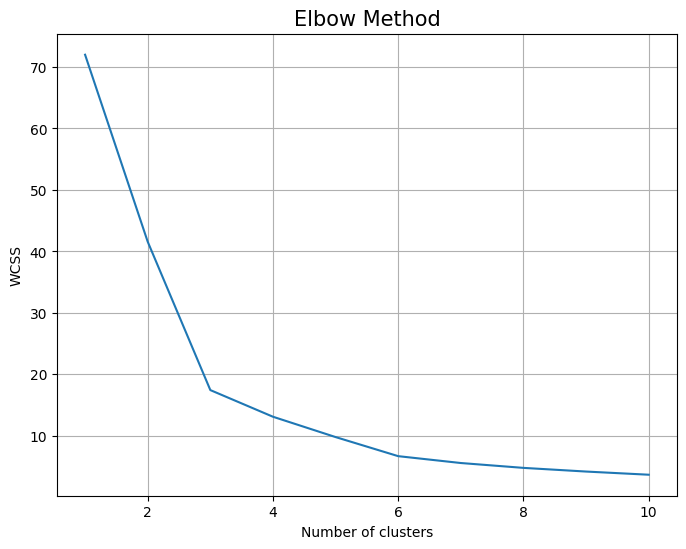

In [27]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [28]:
# Selecting the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)


In [29]:
# Adding cluster labels to the original dataframe
df['Cluster'] = y_kmeans

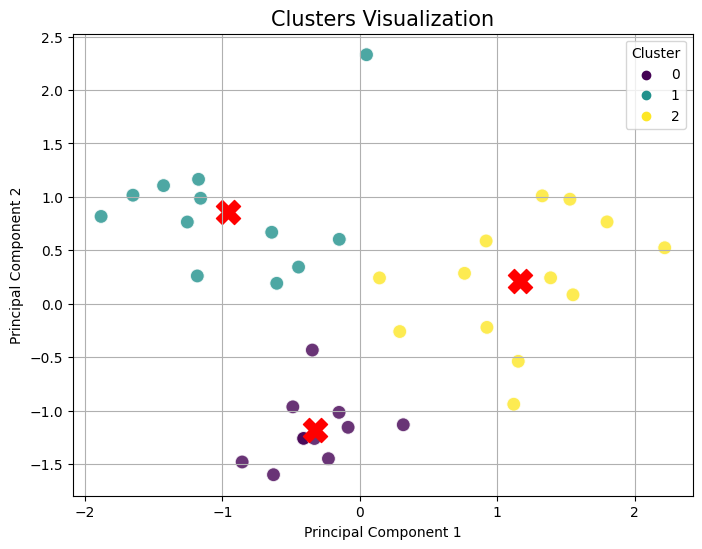

In [30]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Clusters Visualization', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

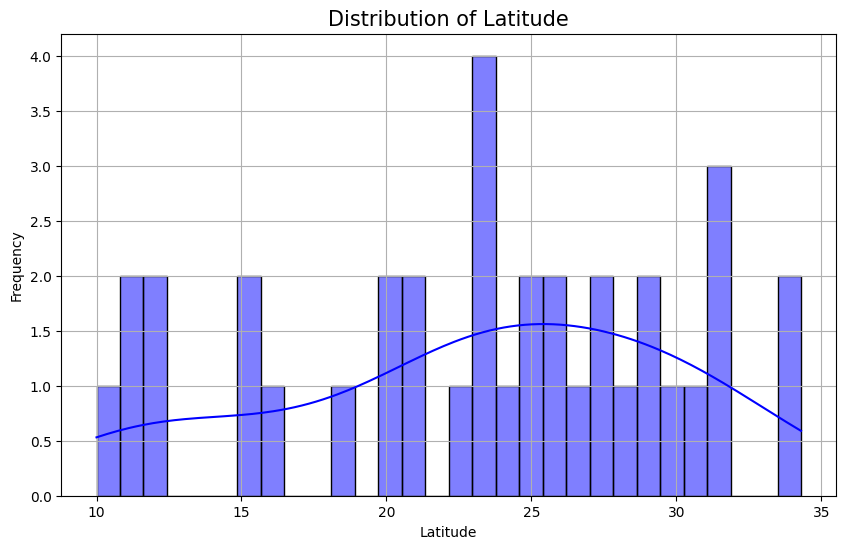

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Latitude'], bins=30, kde=True, color='blue')
plt.title('Distribution of Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

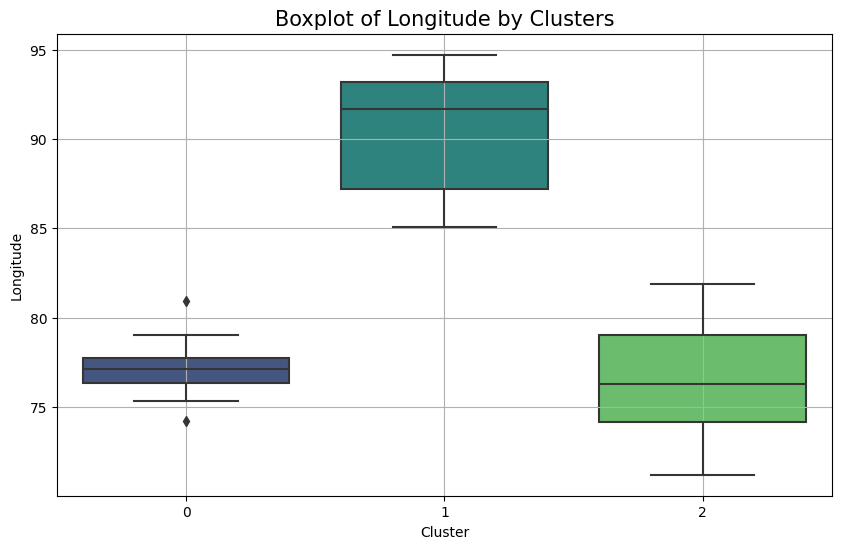

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Longitude', data=df, palette='viridis')
plt.title('Boxplot of Longitude by Clusters', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

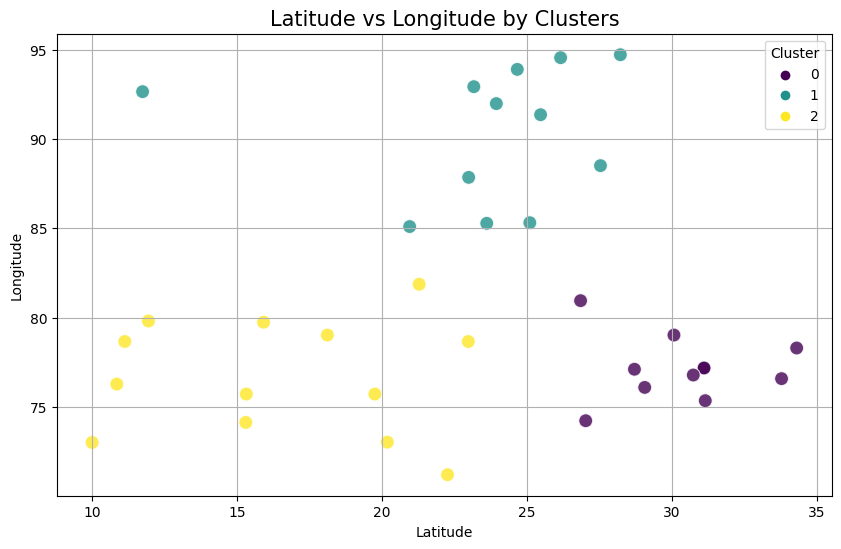

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Longitude', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Latitude vs Longitude by Clusters', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()